<h2>Predição resultado final com base em chutes a gol e potência de times</h2>

#Funções

In [12]:
def GetGrandeza(time):
  supertimes= "Paris SG,Lyon,Roma,Milan,Inter,Lazio,Barcelona,Real Madrid,Ath Madrid,Leverkusen,Bayern Munich"
  timesbons = "FiorentinaCelta de Vigo,Villarreal,Sevilla,Ath Bilbao,Werder Bremen,Wolfsburg,RB Leipzig,Schalke 04"
  retorno = 3
  if supertimes.find(time)>-1:
    retorno = 1
  if timesbons.find(time)>-1:
    retorno = 2
  
  return retorno

def Converter(text):
  retorno = '-1'
  if text == 'A':
    retorno=1
  elif text == 'D':
    retorno = 2
  elif text == 'H':
    retorno = 0
  return retorno

def GetBolsa(B365H,B365A,B365D):
  retorno = 0
  if min(B365H,B365A,B365D) == B365H:
    return retorno
  

def GetBolsaFora(B365H,B365A,B365D):
  retorno = 0
  if min(B365H,B365A,B365D) == B365A:
    return retorno
 
def GetBolsaEmpate(B365H,B365A,B365D):
  retorno = 0
  if min(B365H,B365A,B365D) == B365D:
    return retorno

def DesConverter(text):
    retorno = '-1'
    if text == 1:
      retorno='Away'
    elif text == 2:
      retorno = 'Draw'
    elif text == 0:
      retorno = 'Home'
    return retorno

def GetGrandezaCluster(time):
    grupo['cluster'] = kmeans.labels_
    retorno = grupo[grupo['NOME']==time]['cluster']
    return int(retorno)

#Importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as pl
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=warnings.)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


#Importação datasets

In [69]:

dsLaLiga1617 = pd.read_csv('laliga-1617_csv.csv')
dsLaLiga1718 = pd.read_csv('laliga-1718_csv.csv')
dsLaLiga1819 = pd.read_csv('laliga-1819_csv.csv')

dsPremier1617 = pd.read_csv('season-1617_csv.csv')
dsPremier1718 = pd.read_csv('season-1718_csv.csv')
dsPremier1819 = pd.read_csv('season-1819_csv.csv')

#dsTodos = pd.concat([ dsLaLiga1819,dsLaLiga1617,dsLaLiga1718,dsPremier1617,dsPremier1718,dsPremier1819])
#dsTodos = pd.concat([ dsLaLiga1819,dsLaLiga1617,dsLaLiga1718])
dsTodos=dsLaLiga1819.copy()
dsTodos.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 61 entries, Div to PSCA
dtypes: float64(36), int64(19), object(6)
memory usage: 181.2+ KB


In [70]:
dsTodos.sample(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
222,SP1,09/02/2019,Espanol,Vallecano,2,1,H,0,1,A,15,9,5,3,11,19,6,2,0,2,0,0,1.80,3.60,4.5,1.80,3.7,4.50,1.80,3.60,4.50,1.83,3.71,4.70,1.83,3.60,4.60,1.85,3.70,4.60,34,1.87,1.82,3.75,3.62,4.75,4.51,32,1.97,1.90,2.00,1.91,20,-1.00,2.62,2.53,1.60,1.54,1.70,3.89,5.42
279,SP1,17/03/2019,Villarreal,Vallecano,3,1,H,0,1,A,12,7,4,3,16,7,5,5,3,3,0,0,1.60,4.20,5.5,1.60,4.2,5.25,1.63,4.10,5.10,1.65,4.19,5.35,1.62,4.20,5.25,1.62,4.20,5.25,34,1.66,1.63,4.33,4.15,5.55,5.18,33,1.75,1.70,2.25,2.15,21,-1.00,2.15,2.08,1.85,1.80,1.67,4.07,5.41
165,SP1,22/12/2018,Betis,Eibar,1,1,D,1,0,H,4,15,2,4,11,13,4,11,2,4,0,0,1.80,3.75,4.5,1.78,3.7,4.60,1.75,3.70,4.80,1.81,3.84,4.68,1.78,3.75,4.50,1.85,3.75,4.50,36,1.85,1.80,3.90,3.73,4.80,4.50,34,1.85,1.78,2.11,2.04,22,-1.00,2.56,2.46,1.63,1.57,1.85,3.84,4.43
341,SP1,27/04/2019,Ath Madrid,Valladolid,1,0,H,0,0,D,13,13,1,4,19,12,7,3,4,2,0,0,1.33,4.50,11.0,1.35,4.5,9.25,1.36,4.65,10.00,1.34,4.94,11.89,1.36,4.50,11.00,1.36,4.80,11.00,34,1.40,1.35,4.95,4.64,12.50,10.77,33,2.10,2.05,1.85,1.78,22,-1.50,2.20,2.13,1.80,1.75,1.35,4.63,12.87
303,SP1,06/04/2019,Vallecano,Valencia,2,0,H,1,0,H,15,12,5,3,17,10,4,7,2,3,0,0,4.20,3.50,1.9,4.00,3.6,1.91,3.90,3.60,1.93,4.05,3.72,1.98,3.70,3.60,2.00,4.00,3.60,2.00,34,4.20,3.90,3.73,3.61,2.01,1.95,32,1.95,1.87,2.01,1.94,19,0.25,2.30,2.23,1.71,1.69,4.02,3.74,1.96


#Análises com o dataset

In [39]:
print('verificando tipos dos dados')
dsTodos.dtypes

verificando tipos dos dados


Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
             ...   
BbMxAHA     float64
BbAvAHA     float64
PSCH        float64
PSCD        float64
PSCA        float64
Length: 61, dtype: object

In [76]:
print('Amostra dos dados')
dsTodos.sample(5)

Amostra dos dados


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
319,SP1,15/04/2019,Leganes,Real Madrid,1,1,D,1,0,H,5,13,2,6,11,12,1,5,0,3,0,0,5.25,4.2,1.60,5.00,4.25,1.62,5.00,4.10,1.65,5.19,4.21,1.67,5.25,4.2,1.60,5.20,4.20,1.62,32,5.40,5.08,4.35,4.15,1.68,1.64,31,1.70,1.65,2.35,2.24,19,1.00,1.85,1.79,2.13,2.08,5.08,3.94,1.73
170,SP1,04/01/2019,Espanol,Leganes,1,0,H,1,0,H,12,10,1,2,10,17,3,6,2,5,0,1,2.00,3.3,4.20,2.00,3.20,4.20,2.00,3.30,4.00,2.04,3.28,4.33,2.00,3.2,4.20,2.00,3.30,4.30,36,2.08,2.01,3.33,3.22,4.40,4.20,33,2.67,2.52,1.58,1.52,20,-0.25,1.76,1.72,2.26,2.20,1.99,3.17,4.78
234,SP1,16/02/2019,Vallecano,Ath Madrid,0,1,A,0,0,D,12,4,6,3,10,14,4,6,0,1,0,0,6.00,3.5,1.65,5.75,3.60,1.67,4.90,3.40,1.80,5.68,3.86,1.68,5.50,3.7,1.67,6.00,3.75,1.67,32,6.00,5.51,3.86,3.70,1.80,1.68,31,2.30,2.17,1.74,1.68,18,1.00,1.73,1.67,2.45,2.26,6.59,4.03,1.58
81,SP1,20/10/2018,Real Madrid,Levante,1,2,A,0,2,A,34,6,12,2,10,19,15,1,1,2,0,0,1.14,8.5,19.00,1.15,8.75,16.00,1.17,8.30,14.50,1.15,9.03,18.28,1.15,8.5,15.00,1.15,9.00,20.00,39,1.19,1.15,9.25,8.52,20.95,16.34,32,1.29,1.24,4.33,3.92,20,-2.25,1.98,1.85,2.07,2.02,1.15,8.62,20.52
87,SP1,21/10/2018,Vallecano,Getafe,1,2,A,0,0,D,10,5,3,2,14,25,6,2,5,5,1,0,2.90,3.3,2.50,2.90,3.25,2.50,2.95,3.15,2.55,3.00,3.26,2.61,2.90,3.2,2.55,3.00,3.20,2.60,39,3.00,2.93,3.30,3.19,2.64,2.55,37,2.31,2.23,1.70,1.65,19,0.25,1.78,1.74,2.21,2.16,2.99,3.30,2.58


In [41]:
print('Quantidade de jogos por time')
print(dsTodos['HomeTeam'].value_counts())

Quantidade de jogos por time
Betis          19
Girona         19
Huesca         19
Levante        19
Sevilla        19
Espanol        19
Valladolid     19
Ath Madrid     19
Alaves         19
Leganes        19
Getafe         19
Valencia       19
Ath Bilbao     19
Vallecano      19
Real Madrid    19
Eibar          19
Villarreal     19
Celta          19
Barcelona      19
Sociedad       19
Name: HomeTeam, dtype: int64


In [71]:
print('\nAnálise de gols em casa x fora')
time='Barcelona'
dsTimeEmCasa = dsTodos.loc[dsTodos['HomeTeam']==time]
dsTimeFora = dsTodos.loc[dsTodos['AwayTeam']==time]
print('media de gols do time em casa é ',time,dsTimeEmCasa['FTHG'].mean())
print('media de gols do time fora de casa é ',time,dsTimeFora['FTAG'].mean())


Análise de gols em casa x fora
media de gols do time em casa é  Barcelona 2.6842105263157894
media de gols do time fora de casa é  Barcelona 2.0526315789473686


#Limpeza e Tratamento dos dados


In [77]:
dsTratado = dsTodos[['HomeTeam','AwayTeam','FTHG','FTAG','HTHG', 'HTAG', 'HS','HTR', 'AS','FTR','B365H','B365A','B365D']].copy()
dsTratado

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,B365H,B365A,B365D
0,Betis,Levante,0,3,0,1,22,A,6,A,1.66,5.00,4.00
1,Girona,Valladolid,0,0,0,0,13,D,2,D,1.75,5.00,3.60
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,1.11,21.00,10.00
3,Celta,Espanol,1,1,0,1,12,A,14,D,1.85,4.50,3.50
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,2.04,3.80,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,3.75,1.95,3.75
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,1.85,4.33,3.40
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,8.00,1.36,5.25
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,3.60,1.90,4.00


No código abaixo:

<p>Adicionada coluna VENC pra expressar de forma numerica o ganhador da partida</p>
<p>Atributos GH,e GA (Grandeza Home e Grandeza Away) é calculada de acordo com o 'feeling')</p>
<p>coluna VENC_1T para expressar em forma numerica quem esta ganhando no primeiro tempo</p>
<p>campos BOLSACASA, EMPATE e FORA foram pra expressar a ODD inicial da casa de apostas</p>

In [78]:
dsTratado['GH'] = dsTratado.apply(lambda row: GetGrandeza(row.HomeTeam), axis = 1)
dsTratado['GA'] = dsTratado.apply(lambda row: GetGrandeza(row.AwayTeam), axis = 1)
dsTratado['VENC'] = dsTratado.apply(lambda row: Converter(row.FTR), axis = 1)
dsTratado['VENC_1T'] = dsTratado.apply(lambda row: Converter(row.HTR), axis = 1)
dsTratado['BOLSACASA'] = dsTratado.apply(lambda row: [0, 1][min(row.B365H,row.B365A,row.B365D)==row.B365H], axis=1)
dsTratado['BOLSAFORA'] = dsTratado.apply(lambda row: [0, 1][min(row.B365H,row.B365A,row.B365D)==row.B365A], axis=1)
dsTratado['BOLSAEMPATE'] = dsTratado.apply(lambda row: [0, 1][min(row.B365H,row.B365A,row.B365D)==row.B365D], axis=1)

dsTratado

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,B365H,B365A,B365D,GH,GA,VENC,VENC_1T,BOLSACASA,BOLSAFORA,BOLSAEMPATE
0,Betis,Levante,0,3,0,1,22,A,6,A,1.66,5.00,4.00,3,3,1,1,1,0,0
1,Girona,Valladolid,0,0,0,0,13,D,2,D,1.75,5.00,3.60,3,3,2,2,1,0,0
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,1.11,21.00,10.00,1,3,0,2,1,0,0
3,Celta,Espanol,1,1,0,1,12,A,14,D,1.85,4.50,3.50,2,3,2,1,1,0,0
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,2.04,3.80,3.40,2,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,3.75,1.95,3.75,3,1,2,0,0,1,0
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,1.85,4.33,3.40,2,2,0,0,1,0,0
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,8.00,1.36,5.25,3,3,1,1,0,1,0
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,3.60,1.90,4.00,3,1,2,2,0,1,0


In [45]:

import pandas_profiling as pp
pp.ProfileReport(dsTratado)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
dsTimeHome =  dsTratado.copy()
dsTimeHome['NOME'] = dsTimeHome['HomeTeam']

dsTimeHome['VITORIA'] = dsTimeHome.apply(lambda row: [0, 1][row['VENC'] ==0], axis=1)
dsTimeHome['DERROTA'] = dsTimeHome.apply(lambda row: [0, 1][row['VENC'] ==1], axis=1)
dsTimeHome['EMPATE'] = dsTimeHome.apply(lambda row: [0, 1][row['VENC'] ==2], axis=1)

dsTimeFora =  dsTratado.copy()
dsTimeFora['NOME'] = dsTimeFora['AwayTeam']

dsTimeFora['VITORIA'] = dsTimeFora.apply(lambda row: [0, 1][row['VENC'] ==1], axis=1)
dsTimeFora['DERROTA'] = dsTimeFora.apply(lambda row: [0, 1][row['VENC'] ==0], axis=1)
dsTimeFora['EMPATE'] = dsTimeFora.apply(lambda row: [0, 1][row['VENC'] ==2], axis=1)

dsTimeHome

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,B365H,B365A,B365D,GH,GA,VENC,VENC_1T,BOLSACASA,BOLSAFORA,BOLSAEMPATE,NOME,VITORIA,DERROTA,EMPATE
0,Betis,Levante,0,3,0,1,22,A,6,A,1.66,5.00,4.00,3,3,1,1,1,0,0,Betis,0,1,0
1,Girona,Valladolid,0,0,0,0,13,D,2,D,1.75,5.00,3.60,3,3,2,2,1,0,0,Girona,0,0,1
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,1.11,21.00,10.00,1,3,0,2,1,0,0,Barcelona,1,0,0
3,Celta,Espanol,1,1,0,1,12,A,14,D,1.85,4.50,3.50,2,3,2,1,1,0,0,Celta,0,0,1
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,2.04,3.80,3.40,2,3,1,2,1,0,0,Villarreal,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,3.75,1.95,3.75,3,1,2,0,0,1,0,Levante,0,0,1
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,1.85,4.33,3.40,2,2,0,0,1,0,0,Sevilla,1,0,0
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,8.00,1.36,5.25,3,3,1,1,0,1,0,Valladolid,0,1,0
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,3.60,1.90,4.00,3,1,2,2,0,1,0,Eibar,0,0,1


**Analisando e ordenando por quantidade de vitórias**


In [80]:

dsTimeUnificado = pd.concat([dsTimeHome, dsTimeFora])

dsTimeUnificado.groupby('NOME')['VITORIA'].sum()
grupo=dsTimeUnificado.groupby('NOME', as_index=False).agg({"VITORIA": "sum"}).sort_values('VITORIA',ascending=False)

grupo['ID'] = np.arange(len(grupo))

print(grupo)

           NOME  VITORIA  ID
3     Barcelona       26   0
2    Ath Madrid       22   1
13  Real Madrid       21   2
14      Sevilla       17   3
8        Getafe       15   4
16     Valencia       15   5
4         Betis       14   6
7       Espanol       14   7
0        Alaves       13   8
15     Sociedad       13   9
1    Ath Bilbao       13  10
6         Eibar       11  11
11      Leganes       11  12
12      Levante       11  13
17   Valladolid       10  14
19   Villarreal       10  15
5         Celta       10  16
9        Girona        9  17
18    Vallecano        8  18
10       Huesca        7  19


#Clusterizando para tabela SUPERTIMES

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,VITORIA,cluster
3,26,4
2,22,1
13,21,1
14,17,5
8,15,2
16,15,2
4,14,2
7,14,2
0,13,7
15,13,7


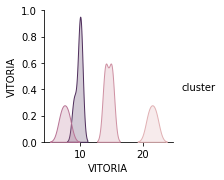

In [83]:
dfCluster = grupo[['VITORIA']]
X = np.array(dfCluster)
from sklearn.cluster import KMeans
kmeans = KMeans( random_state=0)
kmeans.fit(X)
dfCluster['cluster'] = kmeans.labels_
sb.pairplot(dfCluster,hue='cluster')
grupo['cluster'] = kmeans.labels_

#SuperTimes Manual
#dsTratado['GH'] = dsTratado.apply(lambda row: GetGrandeza(row.HomeTeam), axis = 1)
#dsTratado['GA'] = dsTratado.apply(lambda row: GetGrandeza(row.AwayTeam), axis = 1)

#SuperTimes Cluster
dsTratado['GH'] = dsTratado.apply(lambda row: GetGrandezaCluster(row.HomeTeam), axis = 1)
dsTratado['GA'] = dsTratado.apply(lambda row: GetGrandezaCluster(row.AwayTeam), axis = 1)


dfCluster

In [49]:
dsTratado.sample(10)

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,GH,GA,VENC,VENC_1T
344,Girona,Sevilla,1,0,0,0,15,D,7,H,6,5,0,2
339,Sociedad,Villarreal,0,1,0,0,13,D,8,A,7,6,1,2
55,Valencia,Celta,1,1,1,0,14,H,9,D,2,6,2,0
303,Vallecano,Valencia,2,0,1,0,15,H,12,H,3,2,0,0
357,Huesca,Valencia,2,6,0,5,24,A,10,A,3,2,1,1
224,Girona,Huesca,0,2,0,2,13,A,6,A,6,3,1,1
162,Ath Bilbao,Valladolid,1,1,1,0,8,H,5,D,7,6,2,0
53,Leganes,Barcelona,2,1,0,1,10,A,9,H,0,4,0,1
156,Huesca,Villarreal,2,2,1,0,30,H,10,D,3,6,2,0
358,Real Madrid,Villarreal,3,2,2,1,24,H,15,H,1,6,0,0


#Regressão com supertimes para análise

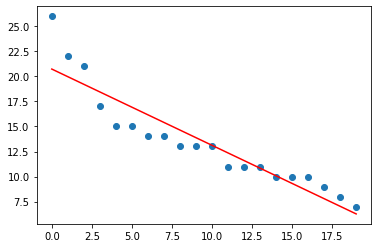

In [84]:
%matplotlib inline
# passando os valores de x e y como Dataframes
dfRegressaoPlot = grupo
X = dfRegressaoPlot[['ID']]
Y = dfRegressaoPlot[['VITORIA']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
pl.scatter(X, Y)

pl.plot(X, Y_pred, color='red')
pl.show()


In [51]:
dsTratado

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,HTR,AS,FTR,GH,GA,VENC,VENC_1T
0,Betis,Levante,0,3,0,1,22,A,6,A,2,0,1,1
1,Girona,Valladolid,0,0,0,0,13,D,2,D,6,6,2,2
2,Barcelona,Alaves,3,0,0,0,25,D,3,H,4,7,0,2
3,Celta,Espanol,1,1,0,1,12,A,14,D,6,2,2,1
4,Villarreal,Sociedad,1,2,1,1,16,D,8,A,6,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Levante,Ath Madrid,2,2,2,0,17,H,17,D,0,1,2,0
376,Sevilla,Ath Bilbao,2,0,1,0,9,H,9,H,5,7,0,0
377,Valladolid,Valencia,0,2,0,1,19,A,9,A,6,2,1,1
378,Eibar,Barcelona,2,2,2,2,15,D,6,D,0,4,2,2


#Amostragem
Home=0   Away= 1   Draw=2

In [102]:
#supertime
treinoDataAtePrimeiroTempo  = pd.DataFrame(dsTratado, columns = ['HTHG', 'HTAG','HS','AS', 'GH','GA'])

#sem supertime
#treinoDataAtePrimeiroTempo  = pd.DataFrame(dsTratado, columns = ['HTHG', 'HTAG','HS','AS'])


treinoTargetAtePrimeiroTempo = pd.DataFrame(dsTratado, columns = ['VENC'])

from sklearn.model_selection import train_test_split
X_train_1t, X_test_1t, y_train_1t, y_test_1t = train_test_split(treinoDataAtePrimeiroTempo, \
                                                                treinoTargetAtePrimeiroTempo, test_size=0.30, random_state=44)


treinoDataInicioPartida  = pd.DataFrame(dsTratado, columns = ['GH','GA'])
treinoTargetInicioPartida = pd.DataFrame(dsTratado, columns = ['VENC'])

from sklearn.model_selection import train_test_split
X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(treinoDataInicioPartida, \
                                                                                treinoTargetInicioPartida, test_size=0.30, random_state=44)

#Treinamento 



In [103]:
from sklearn.naive_bayes import GaussianNB
modeloGaussianNB = GaussianNB()
modeloGaussianNB.fit(X_train_1t,y_train_1t)

from sklearn import svm
modeloSVM = svm.SVC(kernel='linear', C = 1.0)
modeloSVM.fit(X_train_1t,y_train_1t)

from sklearn.neighbors import KNeighborsClassifier
modeloKNeighborsClassifier = KNeighborsClassifier(n_neighbors=3)
modeloKNeighborsClassifier.fit(X_train_1t,y_train_1t)


from sklearn.naive_bayes import GaussianNB
modeloGaussianNB_inicio = GaussianNB()
modeloGaussianNB_inicio.fit(X_train_inicio,y_train_inicio)

from sklearn import svm
modeloSVM_inicio = svm.SVC(kernel='linear', C = 1.0)
modeloSVM_inicio.fit(X_train_inicio,y_train_inicio)

from sklearn.neighbors import KNeighborsClassifier
modeloKNeighborsClassifier_inicio = KNeighborsClassifier(n_neighbors=3)
modeloKNeighborsClassifier_inicio.fit(X_train_inicio,y_train_inicio)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

KNeighborsClassifier(n_neighbors=3)

#Métricas

In [97]:
previsoesGaussianNB = modeloGaussianNB.predict(X_test_1t)
previsoesSVM = modeloSVM.predict(X_test_1t)
previsoesKNeighborsClassifier = modeloKNeighborsClassifier.predict(X_test_1t)

from sklearn import metrics

print('previsoes entrando com dados no segundo tempo')

print("\nAcurácia Gaussian primeiro tempo:",metrics.accuracy_score(y_test_1t, previsoesGaussianNB))
print("Recall Gaussian primeiro tempo:",metrics.precision_score(y_test_1t, previsoesGaussianNB,average='macro'))
print("Precisão Gaussian primeiro tempo:",metrics.precision_score(y_test_1t, previsoesGaussianNB,average='macro'),"\n")

print("Acurácia SVM primeiro tempo:",metrics.accuracy_score(y_test_1t, previsoesSVM))
print("Recall SVM primeiro tempo:",metrics.recall_score(y_test_1t, previsoesSVM,average='macro'))
print("Precisão SVM primeiro tempo:",metrics.precision_score(y_test_1t, previsoesSVM,average='macro'),"\n")

print("Acurácia KNeighborsClassifier primeiro tempo:",metrics.accuracy_score(y_test_1t, previsoesKNeighborsClassifier))
print("Recall KNeighborsClassifier primeiro tempo:",metrics.recall_score(y_test_1t, previsoesKNeighborsClassifier,average='macro'))
print("Precisão KNeighborsClassifier primeiro tempo:",metrics.precision_score(y_test_1t, previsoesKNeighborsClassifier,average='macro'),"\n")


previsoes entrando com dados no segundo tempo

Acurácia Gaussian primeiro tempo: 0.5087719298245614
Recall Gaussian primeiro tempo: 0.3407177095478689
Precisão Gaussian primeiro tempo: 0.3407177095478689 

Acurácia SVM primeiro tempo: 0.5087719298245614
Recall SVM primeiro tempo: 0.488255872063968
Precisão SVM primeiro tempo: 0.3407177095478689 

Acurácia KNeighborsClassifier primeiro tempo: 0.4649122807017544
Recall KNeighborsClassifier primeiro tempo: 0.44153564243519267
Precisão KNeighborsClassifier primeiro tempo: 0.44703703703703707 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
previsoesGaussianNB = modeloGaussianNB_inicio.predict(X_test_inicio)
previsoesSVM = modeloSVM_inicio.predict(X_test_inicio)
previsoesKNeighborsClassifier = modeloKNeighborsClassifier_inicio.predict(X_test_inicio)

print('\n\nprevisoes inicio partida com base somente histórica')

print("\nAcurácia Gaussian início partida:",metrics.accuracy_score(y_test_inicio, previsoesGaussianNB))
print("Recall Gaussian início partida:",metrics.precision_score(y_test_inicio, previsoesGaussianNB,average='macro'))
print("Precisão Gaussian início partida:",metrics.precision_score(y_test_inicio, previsoesGaussianNB,average='macro'))

print("Acurácia SVM início partida:",metrics.accuracy_score(y_test_inicio, previsoesSVM))
print("Recall SVM início partida:",metrics.recall_score(y_test_inicio, previsoesSVM,average='macro'))
print("Precisão SVM início partida:",metrics.precision_score(y_test_inicio, previsoesSVM,average='macro'))

print("Acurácia KNeighborsClassifier início partida:",metrics.accuracy_score(y_test_inicio, previsoesKNeighborsClassifier))
print("Recall KNeighborsClassifier início partida:",metrics.recall_score(y_test_inicio, previsoesKNeighborsClassifier,average='macro'))
print("Precisão KNeighborsClassifier início partida:",metrics.precision_score(y_test_inicio, previsoesKNeighborsClassifier,average='macro'))



previsoes inicio partida com base somente histórica

Acurácia Gaussian início partida: 0.41228070175438597
Recall Gaussian início partida: 0.30128205128205127
Precisão Gaussian início partida: 0.30128205128205127
Acurácia SVM início partida: 0.40350877192982454
Recall SVM início partida: 0.3333333333333333
Precisão SVM início partida: 0.13450292397660818
Acurácia KNeighborsClassifier início partida: 0.39473684210526316
Recall KNeighborsClassifier início partida: 0.36752777457425134
Precisão KNeighborsClassifier início partida: 0.37023276240667546


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Hyperparametros

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_1t, previsoesGaussianNB)) 

              precision    recall  f1-score   support

           0       0.40      0.91      0.56        46
           1       0.00      0.00      0.00        29
           2       0.50      0.13      0.20        39

    accuracy                           0.41       114
   macro avg       0.30      0.35      0.25       114
weighted avg       0.33      0.41      0.30       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.model_selection import GridSearchCV   

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)   

grid.fit(X_train_1t, y_train_1t) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.463 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.453 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.472 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.444 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.453 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.396 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.321 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.358 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.415 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.434 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.453 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.481 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.491 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.491 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.434 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.358 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.377 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.623 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.415 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.472 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.509 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.491 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.434 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.463 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.481 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.491 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.491 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.444 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.358 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.377 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.519 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.453 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.396 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.556 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.509 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.481 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.528 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.481 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.491 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.491 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.472 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.444 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.358 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.415 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.377 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.407 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.415 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.434 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.491 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.491 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.481 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.585 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.396 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.547 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.566 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.537 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.509 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.491 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [58]:
print(grid.best_params_) 
  
print(grid.best_estimator_) 

grid_predictions = grid.predict(X_test_1t) 
  
print(classification_report(y_test_1t, grid_predictions)) 

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)
              precision    recall  f1-score   support

           0       0.48      0.91      0.63        46
           1       0.59      0.55      0.57        29
           2       0.00      0.00      0.00        39

    accuracy                           0.51       114
   macro avg       0.36      0.49      0.40       114
weighted avg       0.35      0.51      0.40       114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Testando

In [106]:
modelo = modeloGaussianNB

timeHome='Barcelona'
timeAway='Eibar'

chutesAGolHome=5
chutesAGolAway=10

golsHome=0
golsAway=0

jogoAtual = [[golsHome,\
              golsAway,\
              chutesAGolHome,\
              chutesAGolAway,\
              GetGrandezaCluster(timeHome),\
              GetGrandezaCluster(timeAway)]]
previsoes = modelo.predict(jogoAtual)

print('A previsão é' ,DesConverter(previsoes))

A previsão é Home


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
#treinoTarget.describe()